In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import numpy as np
np.random.seed(401)
import tensorflow as tf
tf.random.set_seed(401)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve, roc_auc_score, f1_score

import hughes_data 
from CASTNetWrapper import CASTNetWrapper
import hughes_castnet_main
import argparse 
import pickle
import math

import random
random.seed(401)


In [2]:
hughes_castnet_main.run(cook_county=False)


num_train_years: 16
window_size: 3
lead_time: 2
Difference (num_train_years - (window_size + lead_time - 1)): 12


KeyboardInterrupt: 

In [ ]:
user_dir = '/Users/jyontika/Desktop/'
data_dir = 'opioid-overdose-models/CASTNet/hughes-CASTNet/Results/'
results_path = os.path.join(user_dir, data_dir, 'MA_lead_time1.pkl')

with open(results_path, 'rb') as file:
    results = pickle.load(file, encoding='bytes')
    
    
# 'results' stores a dictionary with prediction and loss

# for array in results['preds']:
#     print(array) #shows prediction arrays for every iteration

# # get a specific prediction array 
# specific_array = results['preds'][0]
# print("First array:", specific_array)

# # Accessing loss (loss val for every iteration)
# loss = results['loss']
#print("Other value:", loss)

### Predictions

In [ ]:
all_predictions = results['preds']
print(len(all_predictions)) #number of iterations

5064


In [ ]:
prediction_matrix = np.array(all_predictions)
prediction_matrix = np.maximum(prediction_matrix, 0) #turn all negative values to 0
prediction = prediction_matrix[-1, :]
print(prediction_matrix)


[[0.31052    0.46949023 0.27717918 ... 0.08140838 0.04940462 0.02258205]
 [0.21731997 0.3869418  0.14489985 ... 0.1436683  0.18443602 0.21878564]
 [0.4899665  0.62830454 0.5306425  ... 0.42479473 0.48467672 0.53850025]
 ...
 [0.01364958 0.23322347 0.22150168 ... 0.         0.21361388 0.27610534]
 [0.         0.07749598 0.05948315 ... 0.         0.16195168 0.2240819 ]
 [0.         0.16915423 0.14902103 ... 0.         0.21696116 0.28117228]]


In [ ]:
print(len(prediction))

4860


In [ ]:
prediction_matrix.shape #(num iterations, 1328)

(5064, 4860)

In [ ]:
#take average and medians of prediction matrix
average_array = np.mean(prediction_matrix, axis=0)
median_array = np.median(prediction_matrix, axis=0)

print("Average predictions:", average_array)
print("Median predictions:", median_array)

Average predictions: [0.06132363 0.08903007 0.11595165 ... 0.0549622  0.12088196 0.16476087]
Median predictions: [0. 0. 0. ... 0. 0. 0.]


In [ ]:
##average array STATS

avg_value = np.mean(average_array)
median_value = np.median(average_array)
std_deviation = np.std(average_array)
min_value = np.min(average_array)
max_value = np.max(average_array)

print("Summary Stats for Average Array\n")
print("Mean:", avg_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum:", min_value)
print("Maximum:", max_value)

Summary Stats for Average Array

Mean: 1.1305938
Median: 0.69521403
Standard Deviation: 1.3981303
Minimum: 0.034409206
Maximum: 8.339928


In [ ]:
##Median array STATS
avg_value = np.mean(median_array)
median_value = np.median(median_array)
std_deviation = np.std(median_array)
min_value = np.min(median_array)
max_value = np.max(median_array)

print("Summary Stats for Median Array\n")
print("Mean:", avg_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum:", min_value)
print("Maximum:", max_value)

Summary Stats for Median Array

Mean: 1.070542
Median: 0.5736115
Standard Deviation: 1.4625235
Minimum: 0.0
Maximum: 8.5721245


### Loss

In [ ]:
loss = results['loss']
len(loss) 

5064

In [ ]:
print("Mean", np.mean(loss))
print("Median", np.median(loss))
print("Min", np.min(loss))
print("Max", np.max(loss))

Mean 2.024696358639341
Median 2.029905638694763
Min 0.0804265022277832
Max 2.861619625091553


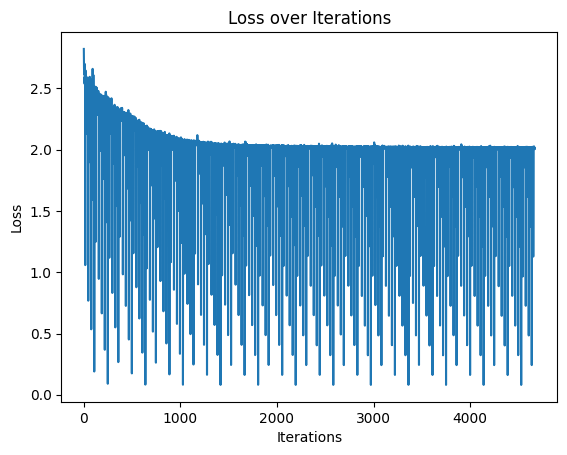

In [ ]:
#plot loss to see if it converges
import matplotlib.pyplot as plt
loss_values = hughes_castnet_main.castnet.results['loss']

iterations = range(1, len(loss_values) + 1)

plt.plot(iterations, loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()


